In [1]:
import os
import ROOT as r
# Package imports.
from Toy_Model.utils.classes import HitPlotOrg, BiasPlotter
from Utils_Python.Plot_Styles_ROOT.tdrstyle_official import setTDRStyle, tdrGrid

Welcome to JupyROOT 6.12/07


In [6]:
line = lambda x: -2 + 4*x

In [7]:
import numpy as np
from array import array

In [8]:
x_vals = np.linspace(-10, 10, 500)
y_vals = line(x_vals)
y_vals_smeared = y_vals + np.random.normal(loc=0.0, scale=3.0, size=len(x_vals))

In [ ]:
def fit_graph_with_line(self, graph):
    """Return a linear fit function and after fitting it to graph."""
    x_min = min(self.d0_ls) 
    x_max = max(self.d0_ls)
    x = r.RooRealVar("x", "d_{0} (impact parameter)", x_min, x_max, "cm")  # (name, title, min, max, units)
    fit_func = r.TF1('f1', '[0]+[1]*x', x_min, x_max)
    fit_func.SetLineColor(2)
    fit_func.SetLineWidth(1)
    fit_func.SetLineStyle(2)
    # Fit it onto a histogram `h1`:
    graph.Fit(fit_func,'S')
    # The option 'S' saves the fit results into a pointer.
    r.gStyle.SetOptFit(111)
    fit_func.Draw("same")
    return fit_func

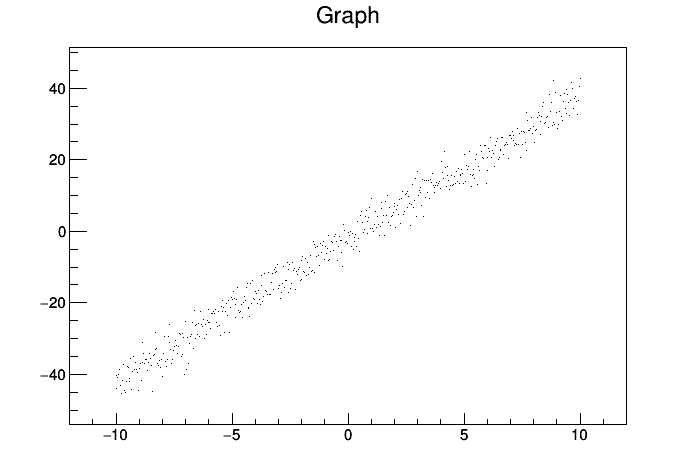

In [9]:
c1 = r.TCanvas()

x_arr = array('f', x_vals)
y_arr_smeared = array('f', y_vals_smeared)
gr = r.TGraph(len(x_vals), x_arr, y_arr_smeared)

gr.Draw("AP")

c1.Draw()

In [12]:
x_min = min(x_arr)
x_max = max(x_arr)
x_test = r.RooRealVar("x_test", "d_{0} (impact parameter)", x_min, x_max, "cm")

In [ ]:
w = r.RooWorkspace('w')


# p0 + p1*x
p0 = r.RooRealVar("p0", "coefficient of x^0 term", 0, -99, 99)
p1 = r.RooRealVar("p1", "coefficient of x^1 term", 1, -99, 99)

poly = r.RooPolynomial("poly", "cubic polynomial", x_test, r.RooArgList(p0, p1) )